# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

#### Problema
Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Rta.** Si yo fuese un tasador de propiedades inmuebles (casas, apartamentos) asignaría una puntuación a ciertos atributos objetivos que le interesan a cualquier persona: su area en m2, su ubicación(el estrato socioeconomico, la seguridad), el número de habitaciones, el acceso a transporte público o lugares de interés como parques y centro comerciales. Aunque tambien tendría en cuenta otros aspectos menos cuantificables como si es necesario hacerle modificaciones para su uso, los materiales usados en su construcción, como el estilo arquitectonico, las vistas.

Ahora bien, como _cientifico de datos_ creo que me serviría trabajar con los datos cuantificables, que sean plenamente objetivos y que una computadora pueda evaluar imparcialmente. Para hallar estos datos podría trabajar con una base de datos que me permita hallar correlaciones entre diferentes atributos y el precio. Y apartir de eso, construir un modelo de Machine Learning que haga predicciones obre el precio.

La lista de datos que podrían llegar ser útiles sería:
- Area disponible en m2
- Área cubierta en m2
- Estrato de la zona
- Seguridad de la zona
- Número de pisos
- Número de habitaciones
- Número de cuartos de baño
- Si las habitciones tienen armarios
- Si está fuera o dentro de un condominio
- Accesibilidad
- Fiabilidad de los servicios publicos

## 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('El dataset tiene {} instancias y {} columnas'.format(data.shape[0], data.shape[1]))

El dataset tiene 146660 instancias y 19 columnas


**Nota:** El dataset debe estar en la misma carpeta que este noteboook con el nombre "DS_Proyecto_01_Datos_Properati".

In [3]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
pd.unique(data['property_type']) # Halla los tipos de propiedad únicos en el dataset

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
types = data.property_type.value_counts() #Obtiene una serie con los valores por cada tipo
types

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [8]:
data.l2.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

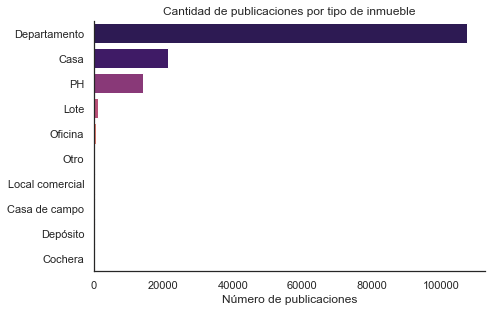

In [9]:
#Tamaño
fig = plt.gcf()
fig.set_size_inches(7, 4.5, forward=True)

#Estilo y color
magma_hm = ["#2a115c", "#3f0f72", "#962c80", "#cb3e72", "#f66c5c", "#fec488"]
sns.set(context='notebook', style='white', palette='magma') #plt.cm.magma_r

#Construcción del gráfico
sns.barplot(x=types.values, y=types.index, orient='h', palette=magma_hm)
plt.title('Cantidad de publicaciones por tipo de inmueble')
plt.xlabel('Número de publicaciones')
sns.despine()
plt.tight_layout()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

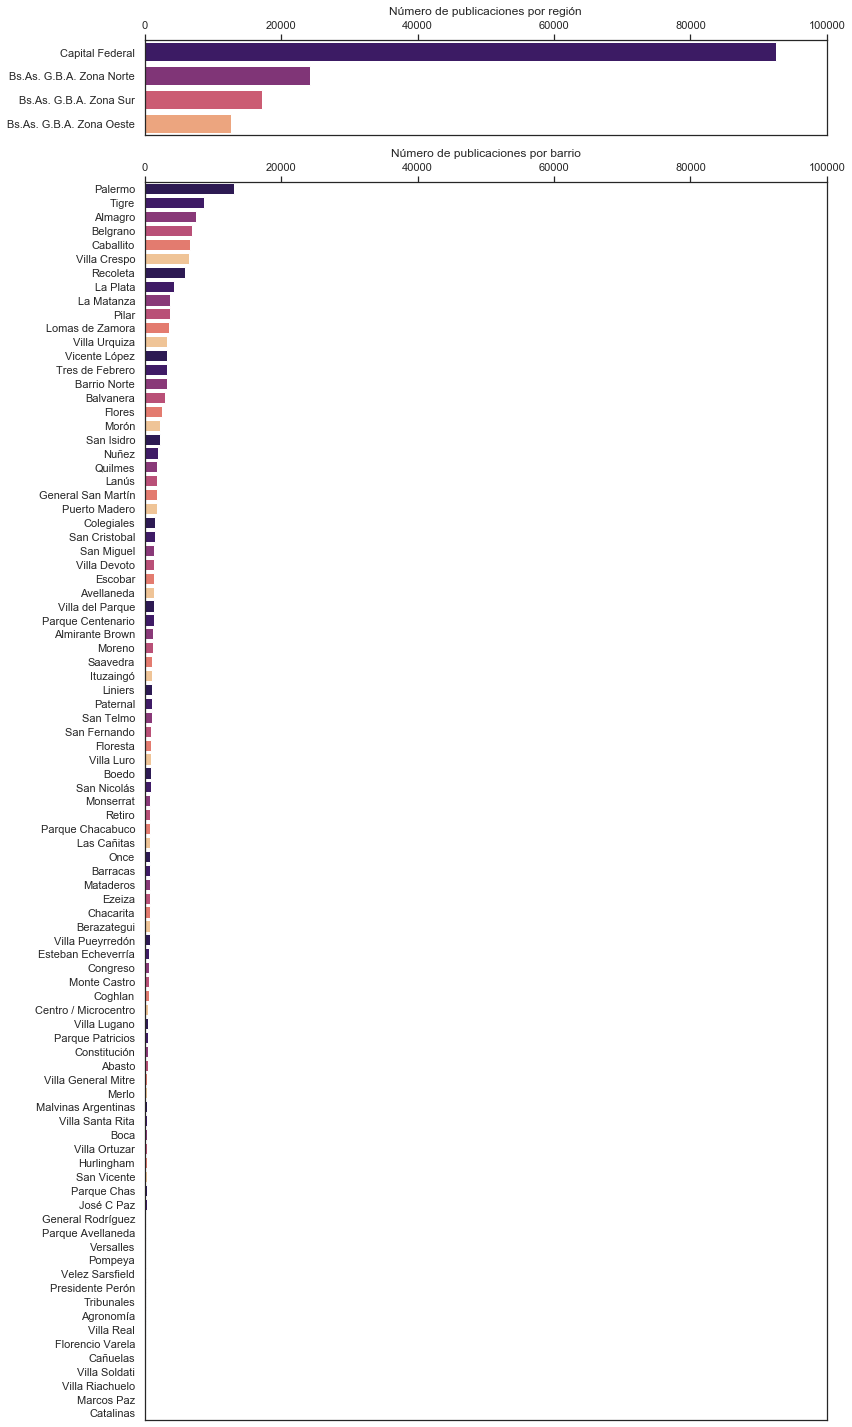

In [10]:
import matplotlib.gridspec as gridspec
plt.figure(figsize = (12,20))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,13])

#  Crea el gráfico por provincia
ax1 = plt.subplot(gs[0])
sns.countplot(data = data, y = "l2", order = data.l2.value_counts().index, palette='magma')
plt.xlim(xmax=100000)
ax1.xaxis.set_label_position('top') 
ax1.xaxis.tick_top()
plt.title('Número de publicaciones por región')
plt.xlabel(None)
plt.ylabel(None)

#  Crea el gráfico por barrio
ax2 = plt.subplot(gs[1])
sns.countplot(data = data, y = "l3", order = data.l3.value_counts().index, palette=magma_hm)
ax2.xaxis.set_label_position('top') 
ax2.xaxis.tick_top()
plt.xlim(xmax=100000)
plt.title('Número de publicaciones por barrio')
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [11]:
filter_list_1 = ['Departamento', 'Casa', 'PH']
data_f1 = data[(data.property_type.isin(filter_list_1)) & (data.l2 == 'Capital Federal')]
print(data_f1.shape)

(91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [12]:
# Quita columnas no relevantes
data_f1.columns
column_drop = ['start_date', 'end_date', 'created_on', 'l1', 'lat', 
               'lon', 'currency', 'title', 'description', 'operation_type']
data_f2 = data_f1.drop(columns = column_drop, inplace = False)
data_f2.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [13]:
data_f2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [14]:
data_f2.columns

Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')

In [15]:
# Filtra superfices cubiertas mayores que superficies totales
data_f3 = data_f2.drop(data_f2.query('surface_covered > surface_total').index, axis=0, inplace=False)
print('Se encuentran {} muestras donde la superficie cubierta es ' 
      'mayor a la total.'.format(data_f2.shape[0] - data_f3.shape[0]))

Se encuentran 760 muestras donde la superficie cubierta es mayor a la total.


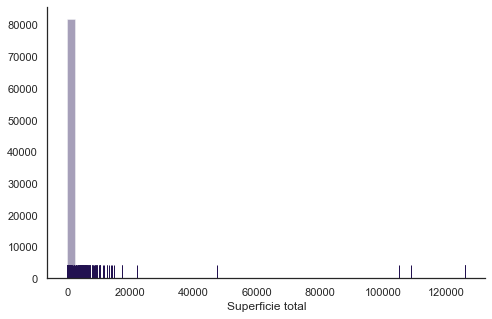

In [16]:
#plt.gcf().set_size_inches(7, 4.5)
plt.rcParams["figure.figsize"]=7,4.6
sns.distplot(data_f3['surface_total'], hist = True, kde = False, rug = True)
plt.xlabel('Superficie total')
plt.tight_layout()
sns.despine()

El histograma de la superficie no dice mucho, un gráfico de caja y bigotes ayudará a visualizar mejor los datos. Hay que señalar que solo unas pocas propiedades hacen que el grafico no se visueize correctamente, por ello hay que filtrar los valores atípicos.

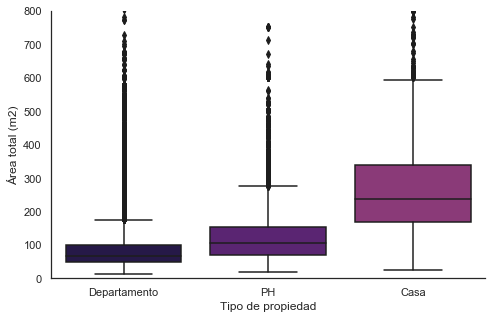

In [17]:
#plt.gcf().set_size_inches(7, 4.5)
#plt.figure(figsize = (25,10))
sns.boxplot(x='property_type', y='surface_total', data=data_f3)
plt.ylim(ymin=0, ymax=800) #límita el eje y para poder visualizar la caja
plt.xlabel('Tipo de propiedad')
plt.ylabel('Área total (m2)')
plt.tight_layout()
sns.despine()

Se eliminan las propiedad con superficie mayor a 600 m2 

In [18]:
data_f4 = data_f3.drop(data_f3[data_f3.surface_total > 600].index, axis=0, inplace=False)
print('Se encuentran {} muestras donde la superficie total es mayor 600.'.format(data_f3.shape[0] - data_f4.shape[0]))

Se encuentran 300 muestras donde la superficie total es mayor 600.


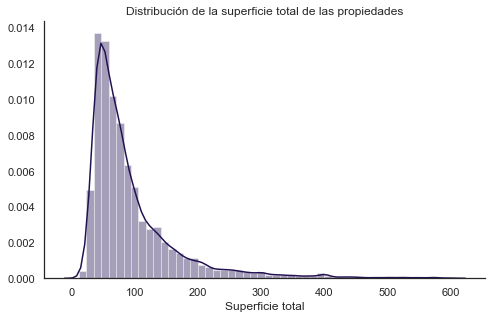

In [19]:
sns.distplot(data_f4['surface_total'], hist = True, kde = True, rug = False, norm_hist=True)
plt.title('Distribución de la superficie total de las propiedades')
plt.xlabel('Superficie total')
plt.tight_layout()
sns.despine()

Ahora, **el precio:** 

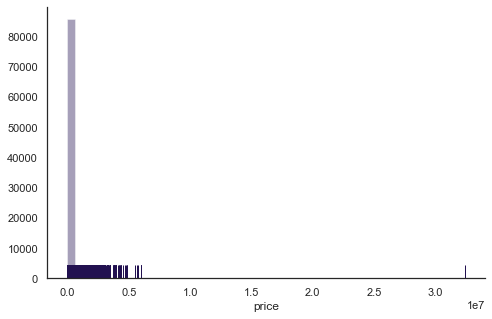

In [20]:
#data_f4.columns
sns.distplot(data_f4['price'], hist = True, kde = False, rug = True)
plt.tight_layout()
sns.despine()

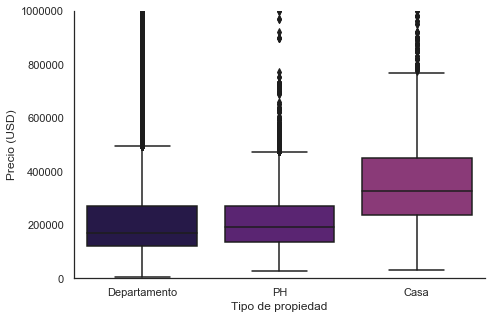

In [21]:
sns.boxplot(x='property_type', y='price', data=data_f4)
plt.ylim(ymin=0, ymax=1000000) #límita el eje y para poder visualizar la caja
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio (USD)')
plt.tight_layout()
sns.despine()

In [22]:
data_f5 = data_f4.drop(data_f4[data_f4.price > 800000].index, axis=0, inplace=False)
print('Se encuentran {} muestras donde el precio es mayor 800k USD.'.format(data_f4.shape[0] - data_f5.shape[0]))

Se encuentran 3279 muestras donde el precio es mayor 800k USD.


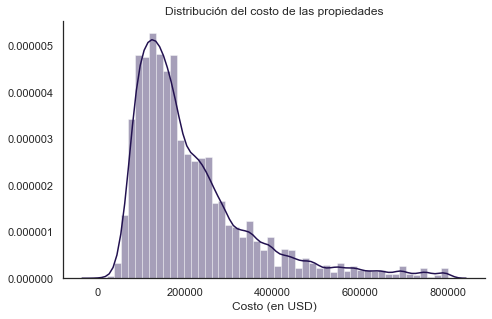

In [23]:
sns.distplot(data_f5['price'], hist = True, kde = True)
plt.title('Distribución del costo de las propiedades')
plt.xlabel('Costo (en USD)')
plt.tight_layout()
sns.despine()

In [24]:
print('Finalmente nos queda un dataframe con {} muestras.'.format(data_f5.shape[0]))

Finalmente nos queda un dataframe con 87146 muestras.


6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

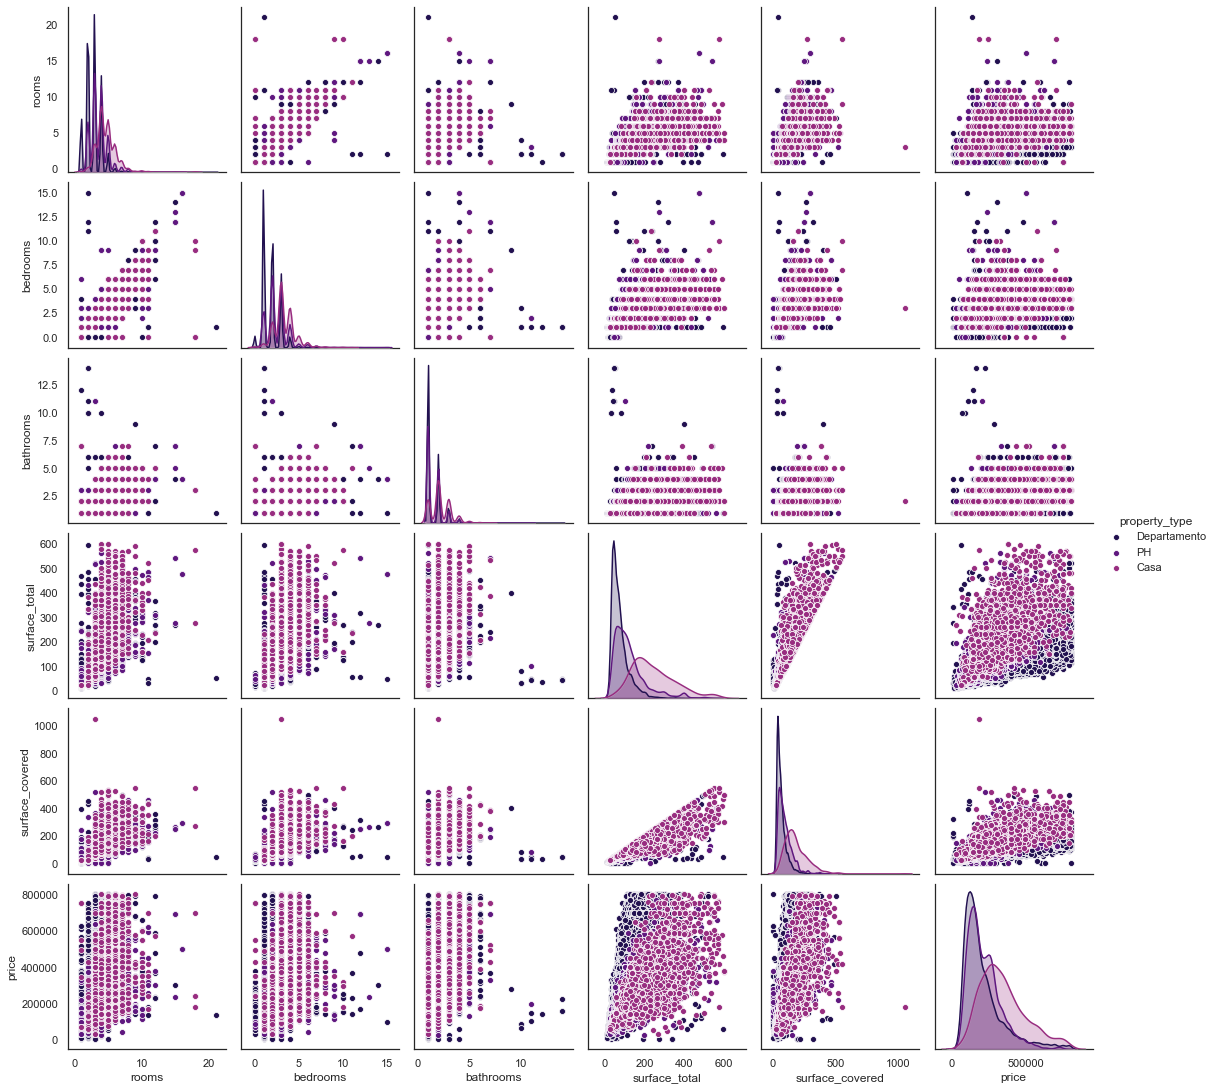

In [25]:
sns.pairplot(data_f5, hue='property_type', )

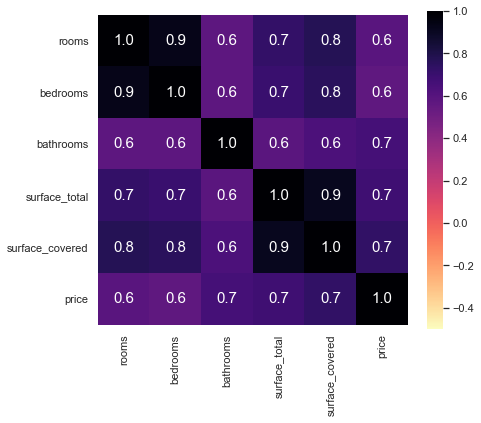

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.932264,0.574214,0.725561,0.774418,0.593583
bedrooms,0.932264,1.000000,0.575609,0.706695,0.755253,0.571055
bathrooms,0.574214,0.575609,1.000000,0.588707,0.640798,0.660945
surface_total,0.725561,0.706695,0.588707,1.000000,0.917126,0.684510
surface_covered,0.774418,0.755253,0.640798,0.917126,1.000000,0.736235
price,0.593583,0.571055,0.660945,0.684510,0.736235,1.000000


In [26]:
plt.figure(figsize = (7, 6))
corr = data_f5.drop(columns=['l2', 'l3','property_type']).corr()
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap=plt.cm.magma_r, vmin=-0.5, vmax=1)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()
corr

Con el gráfico de dispersión y el mapa de calor, se puede observar que hay una mayor correlación entre la supercie cubierta y el precio, que entre el precio y el número de espacios (ambientes, habitaciones, baños). Ahora hallaremos la correlación discriminando por tipo de propiedad.

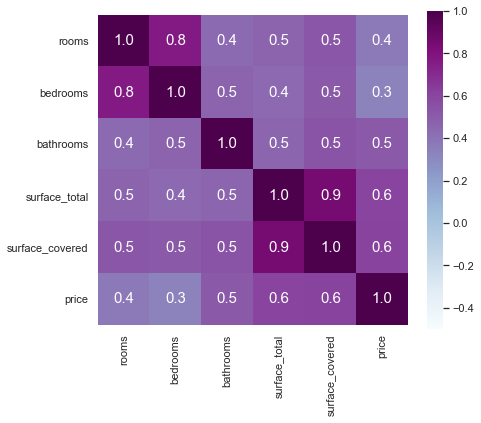

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.770486,0.437728,0.471759,0.527414,0.371395
bedrooms,0.770486,1.000000,0.471341,0.447453,0.511922,0.336111
bathrooms,0.437728,0.471341,1.000000,0.464988,0.539030,0.517891
surface_total,0.471759,0.447453,0.464988,1.000000,0.850203,0.611968
surface_covered,0.527414,0.511922,0.539030,0.850203,1.000000,0.615410
price,0.371395,0.336111,0.517891,0.611968,0.615410,1.000000


In [27]:
corr_casa = data_f5.loc[data_f5['property_type'] == 'Casa'].corr()
plt.figure(figsize = (7, 6))
sns.heatmap(corr_casa, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap='BuPu', vmin=-0.5, vmax=1)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()
corr_casa

La **casas** en general tienen menor correlación con las variables, pero especialmente las correspoendientes a 'espacios', como lo son los ambientes o el número de habitaciones.

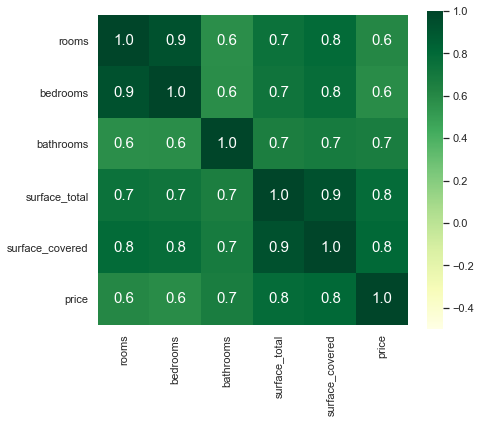

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.932386,0.576748,0.745529,0.790977,0.611737
bedrooms,0.932386,1.000000,0.580518,0.727126,0.771866,0.587379
bathrooms,0.576748,0.580518,1.000000,0.665275,0.685304,0.671849
surface_total,0.745529,0.727126,0.665275,1.000000,0.932045,0.787461
surface_covered,0.790977,0.771866,0.685304,0.932045,1.000000,0.805117
price,0.611737,0.587379,0.671849,0.787461,0.805117,1.000000


In [28]:
corr_depa = data_f5.loc[data_f5['property_type'] == 'Departamento'].corr()
plt.figure(figsize = (7, 6))
sns.heatmap(corr_depa, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap='YlGn', vmin=-0.5, vmax=1)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()
corr_depa

Por otro lado, el tipo de propiedad **departamento** tiene mayor correlación con las variables que las casas. Hay que señalar que la de superficie cubierta es particularmente alta. ¿Esto nos permitiría disminuir el error del módelo de ML si éste tuviera en cuenta el tipo de propiedad?

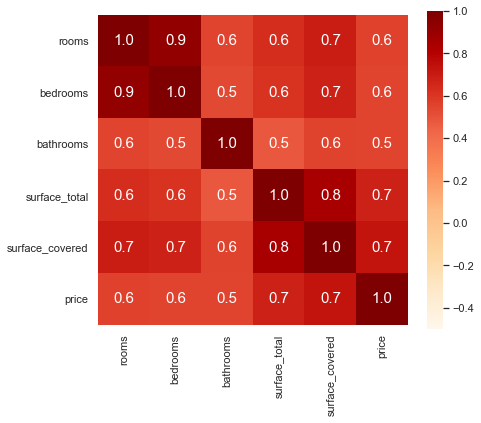

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.926389,0.551400,0.633789,0.695552,0.565163
bedrooms,0.926389,1.000000,0.536736,0.614393,0.679734,0.554449
bathrooms,0.551400,0.536736,1.000000,0.481427,0.556013,0.549314
surface_total,0.633789,0.614393,0.481427,1.000000,0.847974,0.682187
surface_covered,0.695552,0.679734,0.556013,0.847974,1.000000,0.734658
price,0.565163,0.554449,0.549314,0.682187,0.734658,1.000000


In [29]:
corr_ph = data_f5.loc[data_f5['property_type'] == 'PH'].corr()
plt.figure(figsize = (7, 6))
sns.heatmap(corr_ph, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 15},
           xticklabels= corr.columns, 
           yticklabels= corr.columns,
           cmap='OrRd', vmin=-0.5, vmax=1)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()
corr_ph

Finalmente, las **PH** presentan una correlación mucho más parecida a la general.

En definita, las variables que mayor correlación tienen con el target *(precio)* son las de área o superficie, tanto a nivel espeficio como general.

### 2.1 Desafío

***Con el dataset me interesa saber cual barrio tiene mejor relación 'calidad-precio', siendo la calidad, en este caso, la superficie de la propiedad. En otras palabras, en cual barrio debería buscar alguién que desea la mayor canditad de m2 por la menor cantidad de dinero. Vamos allá.***

Vamos a limitar la busqueda a Capital Federal, por lo que el dataset filtrado anterior sirve para esta consulta.
Primeramente

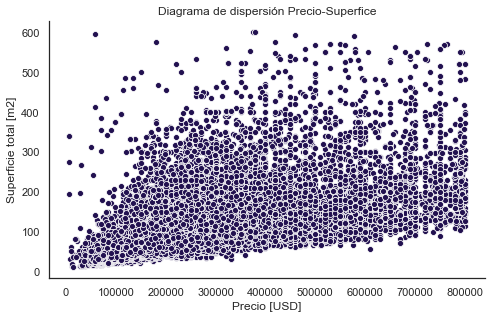

In [30]:
sns.scatterplot(data=data_f5, x='price', y='surface_total', 
                palette='magma', linewidths=0.4, legend=False)
plt.xlabel('Precio [USD]')
plt.ylabel('Superficie total [m2]')
plt.title('Diagrama de dispersión Precio-Superfice')
plt.tight_layout()
sns.despine()

In [31]:
desafio = data_f5.copy()
desafio['m2_price'] = desafio['price']/desafio['surface_total']
desafio.shape

(87146, 10)

In [32]:
lista = desafio.groupby(['l3']).mean().sort_values(by=['m2_price'], ascending=True)
cheap_neigh = np.array(lista.head(2).index)
expensive_neigh = np.array(lista.tail(2).index)
cheap_neigh
print(f'Los barrios más baratos serían pues {cheap_neigh[0]} y {cheap_neigh[1]},')
print(f'mientas que los barrios más costosos son {expensive_neigh[0]} y {expensive_neigh[1]}.')

Los barrios más baratos serían pues Villa Soldati y Villa Lugano,
mientas que los barrios más costosos son Las Cañitas y Puerto Madero.


In [33]:
#lista = lista.reset_index(level=0, inplace=False)
neigh_filter = np.concatenate((cheap_neigh, expensive_neigh), axis=0)
desafio2 = desafio[(desafio.l3.isin(neigh_filter))]
desafio_cheap = desafio[(desafio.l3.isin(cheap_neigh))]
desafio_expen = desafio[(desafio.l3.isin(expensive_neigh))]

Ahora me gustaría visualizar en qué lugar están estos barrios en el gráfico de dispersión anterior.

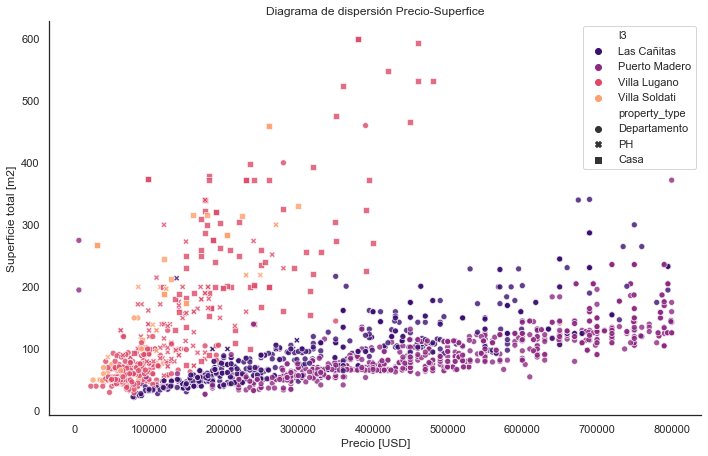

In [34]:
plt.figure(figsize = (10, 6.5))
sns.scatterplot(data=desafio2, x='price', y='surface_total', hue='l3', style='property_type',
                palette='magma', legend='brief', alpha=0.8)
plt.xlabel('Precio [USD]')
plt.ylabel('Superficie total [m2]')
plt.title('Diagrama de dispersión Precio-Superfice')
plt.tight_layout()
sns.despine()

Los barrios costosos mencionados son los que están más cerca de la costa del Río de la PLata. En parte por ello, son tambien lo más comerciales y turísticos, y seguramente los más seguros. Y como se puede observar en el gráfico de dispersión, estos unicamente publican *departamentos*, que cuestan desde 100k hasta 800k USD, aunque la gran mayoría no supera los 200 m2 de superficie total. 

Por otro lado, los barrios Villa Lugano y Villa Soldati se ubican al sur de la ciudad. Esta zona de las ciudades tienden a ser menos accesibles, más inseguras y con muchos menos comercios o centros de trabajo. Esto hace que sus propiedades sean mucho más económicas. Aquí predominan las casas y las propiedades horizontales, aunque tambien publican apartamentos pequeños y baratos. Los precios de la gran mayoría de las propiedades no superan los 400k USD, sin embargo, las superficies de las propiedades pueden llegar hasta los 600 m2. Po ello es que estos barrios son ideales para personas que no tengan muchos recursos y necesiten una inmueble con mucho espacio, o que simplemente no les interesa vivr en zonas tan saturadas de la ciudad.

## 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### Filtrado del dataset

In [35]:
data_ml = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [36]:
# Filtra aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
type_filter = ['Departamento', 'Casa', 'PH']
data_ml1 = data_ml[(data_ml.property_type.isin(type_filter)) & (data_ml.l2 == 'Capital Federal')]
print(data_ml1.shape)

# Filtra aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
data_ml2 = data_ml1.query('15 <= surface_total <= 1000')
print(data_ml2.shape)

# Filtra  aquellas propiedades cuya precio es menor 4'000.000 dólares.
data_ml3 = data_ml2.query('price <= 4000000')
print(data_ml3.shape)

# Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
data_ml4 = data_ml3[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# Descarta aquellas instacias con valores faltantes.
data_ml5 = data_ml4.dropna()
print(data_ml5.shape)

(91485, 19)
(82405, 19)
(82373, 19)
(81019, 6)


### Selección de variables y separación de datos

In [37]:
data_ml5.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [38]:
X = data_ml5.iloc[:,0:5]
y = data_ml5.price

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(64815, 5) (64815,) (16204, 5) (16204,)


### Creación de módelos

Los modelos de Machine Learning serán tres: benchmark, vecinos más cercanos y arbol de decisión. 
El módelo benchmark será calculado únicamente con el promedio del precio de las propiedades, y servira de base para comparar con los módelos de vecinos y de arbol de decisisión.

La métrica que usaremos será la **raíz del error cuadratico promedio** puesto que nos permite decidirnos por el módelo que tiene menor varianza del error, lo cual, para efectos del objetivo es lo ideal. Es decir, conseguir el módelo que sea más consistente con el rango de error más que con el error promedio en sí. 

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#### Benchmark 

In [41]:
print(f'El precio medio de una propiedad del dataset es {int(data_ml5.price.mean())} dólares.')

El precio medio de una propiedad del dataset es 263772 dólares.


In [42]:
def predict_instance(x):
    '''
    Este modelo servirá de base, se fundamenta en que todas las casas
    valen lo mismo: el promedio de dataset.
    '''
    prediction = int(data_ml5.price.mean())
    return prediction

In [43]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

In [44]:
y_train_pred_bench = predict(X_train)

In [45]:
y_test_pred_bench = predict(X_test)

In [46]:
rmse_train_bench = np.sqrt(mean_squared_error(y_train, y_train_pred_bench))
rmse_test_bench = np.sqrt(mean_squared_error(y_test, y_test_pred_bench))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_bench}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_bench}')

Raíz del error cuadrático medio en Train: 300714.3464369837
Raíz del error cuadrático medio en Test: 291775.8751068934


#### Vecinos más cercanos

In [47]:
# Define las listas vacias para los valores de RMSE deseados
rmse_train_knn = []
rmse_test_knn = []

# Define la lista de valores de k que va a explorar
k_vecinos = np.arange(1, 30, 1, dtype=int)

for k in k_vecinos:
    clf = KNeighborsRegressor(n_neighbors= k)
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    rmse_train_knn.append(train_rmse)
    rmse_test_knn.append(test_rmse)

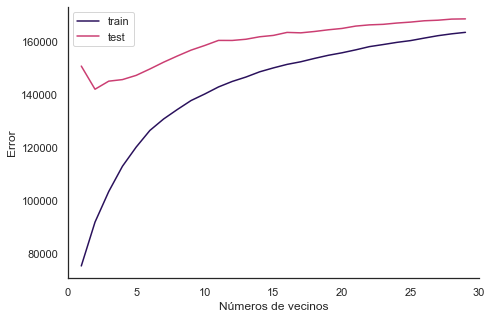

In [48]:
plt.plot(k_vecinos, rmse_train_knn, label='train', color=magma_hm[0] )
plt.plot(k_vecinos, rmse_test_knn, label='test', color=magma_hm[3] )
plt.legend(loc='best')
plt.xlim(xmin=0, xmax=30)
plt.xlabel('Números de vecinos')
plt.ylabel('Error')
plt.tight_layout()
sns.despine()

El número de vecinos óptimo para el modelo es 2 puesto la curva del error de ***test*** alacanza su valor mínimo  en el punto 2, donde se fomra el 'codo'. Ahora creamos el modelo final de vecinos con el hiperparametro seleccionado.

In [49]:
knn_regressor = KNeighborsRegressor(n_neighbors= 2)

In [50]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [51]:
y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

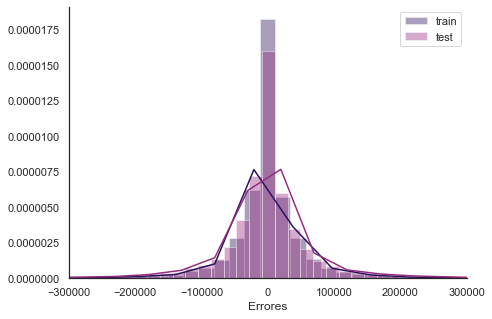

In [52]:
sns.distplot(y_train - y_train_pred_knn, bins = 250, color=magma_hm[0] , label = 'train', )
sns.distplot(y_test - y_test_pred_knn, bins = 250, color=magma_hm[2], label = 'test', )
plt.xlabel('Errores')
plt.xlim(xmin=-300000, xmax=300000)
plt.legend()

plt.tight_layout()
sns.despine()
plt.show()

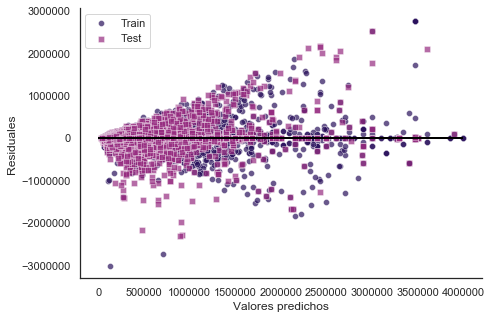

In [53]:
plt.scatter(y_train_pred_knn,  y_train_pred_knn - y_train, marker='o', color=magma_hm[0], 
            edgecolor='white', linewidths=0.5, alpha=0.7, label='Train')
plt.scatter(y_test_pred_knn,  y_test_pred_knn - y_test, marker='s', color=magma_hm[2],
            edgecolor='white', linewidths=0.5, alpha=0.7, label='Test')

plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=4000000, color='black', lw=2)
plt.tight_layout()
sns.despine()
plt.show()

In [54]:
rmse_train_knnfinal = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knnfinal = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knnfinal}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knnfinal}')

Raíz del error cuadrático medio en Train: 91658.08761175128
Raíz del error cuadrático medio en Test: 141932.52742824974


#### Arbol de decisión

In [55]:
# Define las listas vacias para los valores de RMSE deseados
rmse_train_tree = []
rmse_test_tree = []

# Define la lista de valores de k que va a explorar
n_nodes = np.arange(1, 30, 1, dtype=int)

for n in n_nodes:
    tree = DecisionTreeRegressor(max_depth= n)
    tree.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    rmse_train_tree.append(train_rmse)
    rmse_test_tree.append(test_rmse)

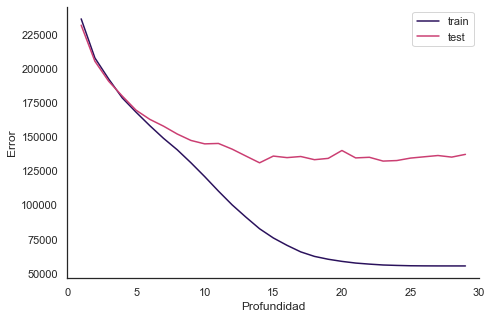

In [56]:
plt.plot(n_nodes, rmse_train_tree, label='train', color=magma_hm[0] )
plt.plot(n_nodes, rmse_test_tree, label='test', color=magma_hm[3] )
plt.legend(loc='best')
plt.xlim(xmin=0, xmax=30)
plt.xlabel('Profundidad')
plt.ylabel('Error')
plt.tight_layout()
sns.despine()

La profundidad optima está, según la curva de validación, entre 10 y 14 nodos. Para el modelo se escogerá una profundidad máxima de 14 ya que es la que tiene menor error en el set de prueba.

In [57]:
tree_regressor = DecisionTreeRegressor(max_depth=14)

In [58]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

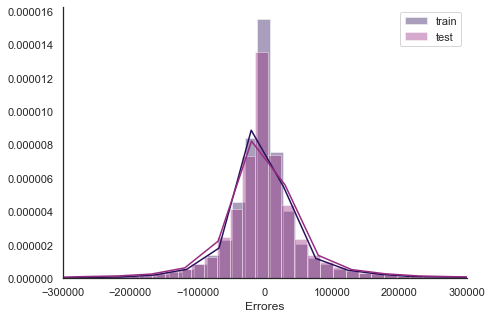

In [60]:
sns.distplot(y_train - y_train_pred_tree, bins = 250, color=magma_hm[0], label = 'train', )
sns.distplot(y_test - y_test_pred_tree, bins = 250, color=magma_hm[2], label = 'test', )
plt.xlabel('Errores')
plt.xlim(xmin=-300000, xmax=300000)
plt.legend()

plt.tight_layout()
sns.despine()
plt.show()

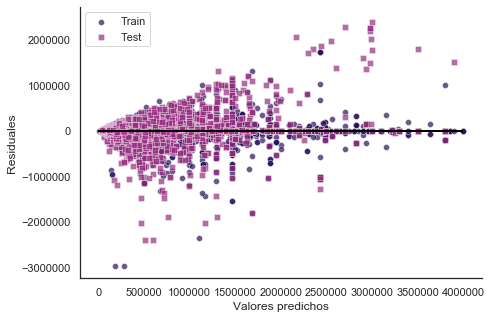

In [61]:
plt.scatter(y_train_pred_tree,  y_train_pred_tree - y_train, marker='o', color=magma_hm[0], 
            edgecolor='white', linewidths=0.5, alpha=0.7, label='Train')
plt.scatter(y_test_pred_tree,  y_test_pred_tree - y_test, marker='s', color=magma_hm[2],
            edgecolor='white', linewidths=0.5, alpha=0.7, label='Test')

plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=4000000, color='black', lw=2)
plt.tight_layout()
sns.despine()
plt.show()

In [62]:
rmse_train_treefinal = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_treefinal = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_treefinal}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_treefinal}')

Raíz del error cuadrático medio en Train: 82414.25252167092
Raíz del error cuadrático medio en Test: 137083.06223074964


#### Comparación de los modelos

In [63]:
mse_table = {
    'model' : ['benchmark', 'benchmark', 'knn', 'knn', 'tree', 'tree'],
    'data' : ['train', 'test', 'train', 'test', 'train', 'test'],
    'rmse' : [rmse_train_bench, rmse_test_bench, rmse_train_knnfinal, rmse_test_knnfinal,
              rmse_train_treefinal, rmse_test_treefinal]
}

rmse_comparison = pd.DataFrame(mse_table)
rmse_comparison

,model,data,rmse
0,benchmark,train,300714.346437
1,benchmark,test,291775.875107
2,knn,train,91658.087612
3,knn,test,141932.527428
4,tree,train,82414.252522
5,tree,test,137083.062231


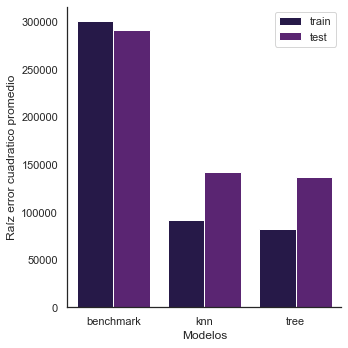

In [64]:
sns.catplot(x="model", y='rmse', hue="data", kind="bar", data=rmse_comparison, legend=False)
plt.xlabel('Modelos')
plt.ylabel('Raíz error cuadratico promedio')
plt.legend(loc='upper right')

#### Conclusión 
Como se observa en la comparativa, tanto el módelo de vecinos como el árbol de decisión tienen un rendimiento muy similar. Ambos reducen considerablemente el error del *baseline*. Sin embargo, para este caso, nos decantaremos por el módelo generado con árbol de decisión, ya que el error es menor que en knn (137k vs 141k USD). Además, con este modelo no se requerirá conservar el dataset de Properati, solo será necesario el arbol de decisión generado.

Si bien el desempeño del modelo mejora con respecco a el benchmark, para la practica se necesitaría un error bastante menor. Por ello, en el futuro sería necesario complementar el dataset con datos más específicos del entorno de la propiedad, como puede ser el índice de crímenes por zona, el estrato socioeconómico, el número de comercios a la redonda, entre otros. Estos features sin duda mejorarían el rendimiento del modelo para lograr predicciones más precisas que le añadan vaor al proceso de valuación de propiedades de la inmobiliaria. 